In [1]:
from datetime import datetime as time
import copy

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.naive_bayes import GaussianNB


In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
dataset = pd.read_csv("../assets/stars.csv")
dataset.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


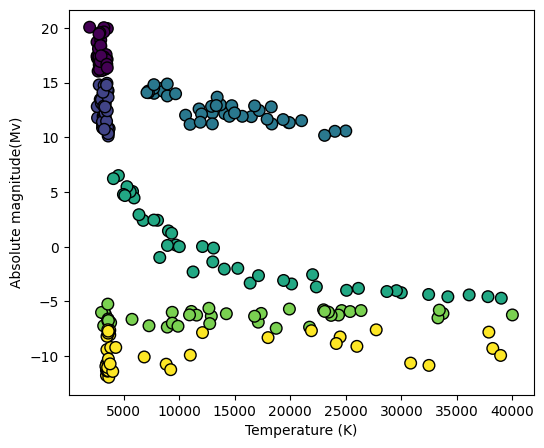

In [4]:
plt.scatter(dataset['Temperature (K)'], dataset["Absolute magnitude(Mv)"], c=dataset["Star type"], s=70, edgecolors='k')
plt.gcf().set_size_inches((6, 5))

plt.ylabel("Absolute magnitude(Mv)")
plt.xlabel("Temperature (K)")
plt.savefig("../assets/classification_dataset_sample.png", bbox_inches='tight')

In [5]:
y = dataset["Star type"]
X = dataset.drop(["Star type"], axis=1)

le = LabelEncoder()

X["Spectral Class"] = le.fit_transform(X["Spectral Class"])
X["Star color"] = le.fit_transform(X["Star color"])

X = X.to_numpy()
y = y.to_numpy()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
print(X_train.shape, X_test.shape)

(144, 6) (96, 6)


## Custom

In [16]:
from naive_bayes import NaiveBayes as CustomNaiveBayes

model = CustomNaiveBayes()

fit_t1_custom = time.now()
model.fit(X_train, y_train)
fit_t2_custom = time.now()


t1_custom = time.now()
y_pred = model.predict(X_test)
t2_custom = time.now()

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        17
           2       1.00      0.89      0.94        18
           3       0.83      0.77      0.80        13
           4       0.81      1.00      0.90        13
           5       1.00      1.00      1.00        20

    accuracy                           0.95        96
   macro avg       0.94      0.94      0.94        96
weighted avg       0.95      0.95      0.95        96



## Sklearn

In [17]:
gnb = GaussianNB()

fit_t1_sklearn = time.now()
gnb.fit(X_train, y_train)
fit_t2_sklearn = time.now()


t1_sklearn = time.now()
y_pred = gnb.predict(X_test)
t2_sklearn = time.now()

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.84      0.94      0.89        17
           2       0.86      1.00      0.92        18
           3       1.00      0.54      0.70        13
           4       0.81      1.00      0.90        13
           5       1.00      1.00      1.00        20

    accuracy                           0.90        96
   macro avg       0.91      0.88      0.88        96
weighted avg       0.91      0.90      0.89        96



## Compare

In [18]:
print(
    "Время, затраченное на обучение:\n" + 
    f" - Кастомный алгоритм: {(fit_t2_custom - fit_t1_custom).microseconds / 1000:.3f} мс\n" + 
    f" - Sklearn алгоритм: {(fit_t2_sklearn - fit_t1_sklearn).microseconds / 1000:.3f} мс"
)
print()

print(
    "Время, затраченное на предсказание:\n" + 
    f" - Кастомный алгоритм: {(t2_custom - t1_custom).microseconds / 1000:.3f} мс\n" + 
    f" - Sklearn алгоритм: {(t2_sklearn - t1_sklearn).microseconds / 1000:.3f} мс"
)


Время, затраченное на обучение:
 - Кастомный алгоритм: 0.853 мс
 - Sklearn алгоритм: 1.187 мс

Время, затраченное на предсказание:
 - Кастомный алгоритм: 3.001 мс
 - Sklearn алгоритм: 0.812 мс


In [10]:
def cross_validate(model, X, y, n_folds=5):
    scores = []
    for n in range(n_folds):
        model2fit = copy.deepcopy(model)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
        model2fit.fit(X_train, y_train)
        scores += [accuracy_score(y_test, model2fit.predict(X_test))]
    return scores

In [11]:
n_folds = 20

custom_model = CustomNaiveBayes()
sklearn_model = GaussianNB()

custom_scores = cross_validate(custom_model, X, y, n_folds=n_folds)
sklearn_scores = cross_validate(sklearn_model, X, y, n_folds=n_folds)

In [12]:
print(f"Средняя точность для {n_folds} выборок у кастомного алгоритма: {np.mean(custom_scores):.3f}")
print(f"Средняя точность для {n_folds} выборок у Sklearn алгоритма: {np.mean(sklearn_scores):.3f}")

Средняя точность для 20 выборок у кастомного алгоритма: 0.962
Средняя точность для 20 выборок у Sklearn алгоритма: 0.852
